# Homework 3

1. Open the Drosophila Network already provided.

2. Check the various properties of the network:
- Is the network scale free.
- Can you find the important players of the network?

# Loading Packages

In [1]:
# NetworkX
import networkx as nx

# Powerlaw
import powerlaw

# Math
import numpy as np
import pandas as pd

# Plot
%matplotlib inline
import matplotlib.pyplot as plt

# Read Data

In [2]:
df = pd.read_csv('drosophhila_net.csv', delimiter='\t')

# Create Graph

In [3]:
def create_graph(df):
    g = nx.Graph()
    g.add_edges_from(np.array(df.iloc[:, [0, 1]]))
    return g

In [4]:
g = create_graph(df)

In [5]:
len(g.nodes())

3610

# Scale

In [74]:
d = sorted([d for n, d in G.degree()], reverse=True)

Text(0, 0.5, 'Number')

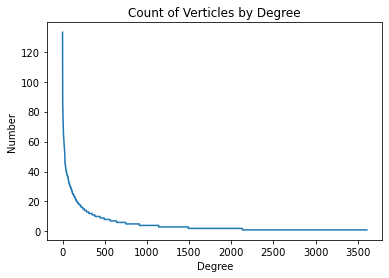

In [75]:
plt.plot(degree_sequence)
plt.title('Count of Verticles by Degree')
plt.xlabel('Degree')
plt.ylabel('Number')

In [47]:
pl = powerlaw.Fit(
    d,
    xmin=1,
    discrete=True
) 

In [6]:
pl.plot_pdf() # (color='b', linewidth=2)
pl.power_law.plot_pdf(color='r', linestyle='-');

NameError: name 'pl' is not defined

In [65]:
pl.power_law.sigma

0.010339668081270115

Sigma is small so i think it is scale free.

# Can you find the important players of the network?

In [117]:
def get_best(G, k=5, rank=nx.pagerank):
    """get_best
    
    """
    
    pr = rank(G)
    
    keys   = np.array(list(pr.keys()))
    values = np.array(list(pr.values()))
    
    return keys[np.argsort(values)[-k:]]

In [124]:
k = 100

In [142]:
set(get_best(G, rank=nx.pagerank, k=k)).intersection(
    set(get_best(G, rank=lambda x: nx.hits(x)[0], k=k))
)

{'FBgn0000063',
 'FBgn0000719',
 'FBgn0003302',
 'FBgn0003479',
 'FBgn0004107',
 'FBgn0004597',
 'FBgn0005683',
 'FBgn0010316',
 'FBgn0011648',
 'FBgn0013762',
 'FBgn0016131',
 'FBgn0024189',
 'FBgn0024371',
 'FBgn0025674',
 'FBgn0026176',
 'FBgn0026238',
 'FBgn0026371',
 'FBgn0027364',
 'FBgn0027592',
 'FBgn0028509',
 'FBgn0030400',
 'FBgn0030668',
 'FBgn0031372',
 'FBgn0031768',
 'FBgn0031957',
 'FBgn0033631',
 'FBgn0034651',
 'FBgn0035397',
 'FBgn0035641',
 'FBgn0036183',
 'FBgn0036257',
 'FBgn0036595',
 'FBgn0036950',
 'FBgn0036977',
 'FBgn0037345',
 'FBgn0037382',
 'FBgn0039395',
 'FBgn0039856',
 'FBgn0039858',
 'FBgn0042102',
 'FBgn0045759',
 'FBgn0259168',
 'FBgn0263111',
 'FBgn0265998'}